In [2]:
# Importing necessary Modules 
#import packages
import pandas as pd
from pandas import datetime
import numpy as np


#to plot within notebook
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
# Above is a special style template for matplotlib, highly useful for visualizing time series data

import seaborn as sns


#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,10


import tensorflow as tf 

from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
from sklearn.preprocessing import MinMaxScaler,StandardScaler

/var/folders/85/n2q4366x0vl1tff6jpb7lksr0000gn/T/ipykernel_1260/3139438057.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [3]:
# Load Train and Test Data
df_Train = pd.read_csv('./dataset/CH22_Demand_XY_Train.csv')
df_Test = pd.read_csv('./dataset/CH22_Demand_raw_X_Test.csv')

print("Information about Traindata_set: ")
df_Train.info()

Information about Traindata_set: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41932 entries, 0 to 41931
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   DateTime  41932 non-null  object 
 1   X1        41932 non-null  float64
 2   X2        41932 non-null  float64
 3   X3        41932 non-null  float64
 4   X4        41932 non-null  float64
 5   Y         41932 non-null  float64
dtypes: float64(5), object(1)
memory usage: 1.9+ MB


In [4]:
# How does the actual data look like
print("First 5 entries in Train Data:")
df_Train.head()

First 5 entries in Train Data:


DateTime        X1     X2      X3      X4             Y
0  2022-01-01 00:00:00  2.186333  13.76  0.0663  0.1547  521163.83540
1  2022-01-01 00:10:00  2.138000  13.90  0.0910  0.1105  449066.62018
2  2022-01-01 00:20:00  2.104333  13.90  0.0806  0.1300  437394.72159
3  2022-01-01 00:30:00  2.040333  14.00  0.1183  0.1248  422107.63292
4  2022-01-01 00:40:00  1.973667  14.14  0.0624  0.1105  406923.83540

In [5]:
# def data_inv(df):
print("Unknown Dataset size:",df_Train.shape[0])
print('dataset variables: ',df_Train.shape[1])
print('-'*10)
print('dateset columns: \n')
print(df_Train.columns)
print('-'*10)

Unknown Dataset size: 41932
dataset variables:  6
----------
dateset columns: 

Index(['DateTime', 'X1', 'X2', 'X3', 'X4', 'Y'], dtype='object')
----------


In [6]:
# Separate Train data into features and result
attributes = ["DateTime","X1","X2","X3","X4"]
df_Train_Features = df_Train[attributes]
df_Train_Result = df_Train["Y"]
df_Train_Features.head()

DateTime        X1     X2      X3      X4
0  2022-01-01 00:00:00  2.186333  13.76  0.0663  0.1547
1  2022-01-01 00:10:00  2.138000  13.90  0.0910  0.1105
2  2022-01-01 00:20:00  2.104333  13.90  0.0806  0.1300
3  2022-01-01 00:30:00  2.040333  14.00  0.1183  0.1248
4  2022-01-01 00:40:00  1.973667  14.14  0.0624  0.1105

In [7]:
# NOTE: Doing all transformation on df_Train_Features_Transform , once successfull save to df_Train_Features

#How is the timestamp
df_Train_Features_Transform = df_Train_Features
print("Type of DateTime:",type(df_Train_Features_Transform["DateTime"][0]))

#Converting DateTime into separate Date and Time: 
df_Train_Features_Transform['Dates'] = pd.to_datetime(df_Train_Features_Transform['DateTime']).dt.date
df_Train_Features_Transform['Time'] = pd.to_datetime(df_Train_Features_Transform['DateTime']).dt.time

df_Train_Features_Transform


Type of DateTime: <class 'str'>


DateTime        X1     X2      X3      X4       Dates  \
0      2022-01-01 00:00:00  2.186333  13.76  0.0663  0.1547  2022-01-01   
1      2022-01-01 00:10:00  2.138000  13.90  0.0910  0.1105  2022-01-01   
2      2022-01-01 00:20:00  2.104333  13.90  0.0806  0.1300  2022-01-01   
3      2022-01-01 00:30:00  2.040333  14.00  0.1183  0.1248  2022-01-01   
4      2022-01-01 00:40:00  1.973667  14.14  0.0624  0.1105  2022-01-01   
...                    ...       ...    ...     ...     ...         ...   
41927  2022-10-19 03:50:00  5.856667  17.66  0.1092  0.1391  2022-10-19   
41928  2022-10-19 04:00:00  5.860000  17.66  0.1183  0.1495  2022-10-19   
41929  2022-10-19 04:10:00  5.846667  17.68  0.1001  0.1976  2022-10-19   
41930  2022-10-19 04:20:00  5.856667  17.66  0.1183  0.1391  2022-10-19   
41931  2022-10-19 04:30:00  5.876667  17.68  0.0767  0.1690  2022-10-19   

           Time  
0      00:00:00  
1      00:10:00  
2      00:20:00  
3      00:30:00  
4      00:40:00  
...         ...  
41927  03:50:00  
41928  04:00:00  
41929  04:10:00  
41930  04:20:00  
41931  04:30:00  

[41932 rows x 7 columns]

In [8]:
#Checking range of Value of Each Column [X1 , X2 , X3 , X4]
X1_Max = df_Train_Features_Transform["X1"].max()
X1_Min = df_Train_Features_Transform["X1"].min()

X2_Max = df_Train_Features_Transform["X2"].max()
X2_Min = df_Train_Features_Transform["X2"].min()

X3_Max = df_Train_Features_Transform["X3"].max()
X3_Min = df_Train_Features_Transform["X3"].min()

X4_Max = df_Train_Features_Transform["X4"].max()
X4_Min = df_Train_Features_Transform["X4"].min()

print("The Max and Min Values in Feature Column X1 , X2 , X3 , X4")
print("X1- Max:",round(X1_Max,2)," Min:",round(X1_Min,2))
print("X2- Max:",round(X2_Max,2)," Min:",round(X2_Min,2))
print("X3- Max:",round(X3_Max,2)," Min:",round(X3_Min,2))
print("X4- Max:",round(X4_Max,2)," Min:",round(X4_Min,2))


The Max and Min Values in Feature Column X1 , X2 , X3 , X4
X1- Max: 13.34  Min: 1.08
X2- Max: 17.76  Min: 1.27
X3- Max: 1511.9  Min: 0.01
X4- Max: 1216.8  Min: 0.02


<AxesSubplot:xlabel='DateTime'>

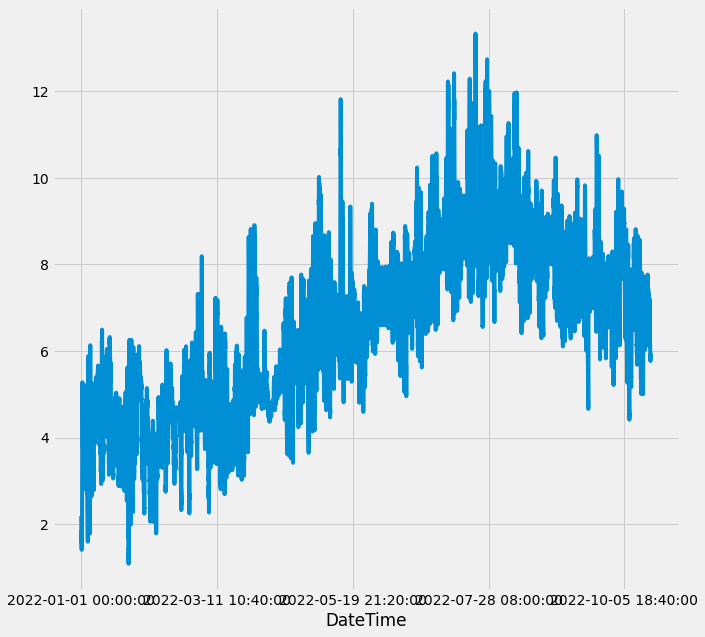

In [9]:
df_Train_Features_Transform.index = df_Train_Features_Transform["DateTime"]
X1 = df_Train_Features_Transform["X1"]
X1.plot()

<AxesSubplot:xlabel='DateTime'>

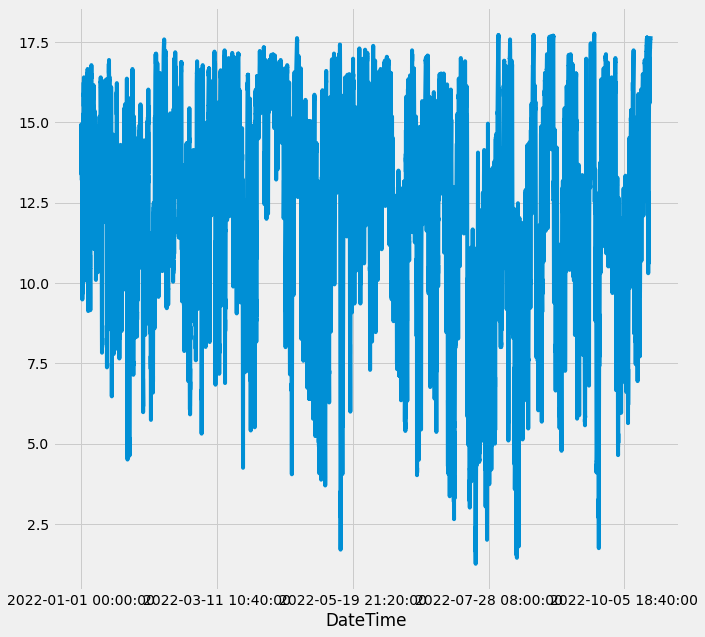

In [10]:
X2 = df_Train_Features_Transform["X2"]
X2.plot()

<AxesSubplot:xlabel='DateTime'>

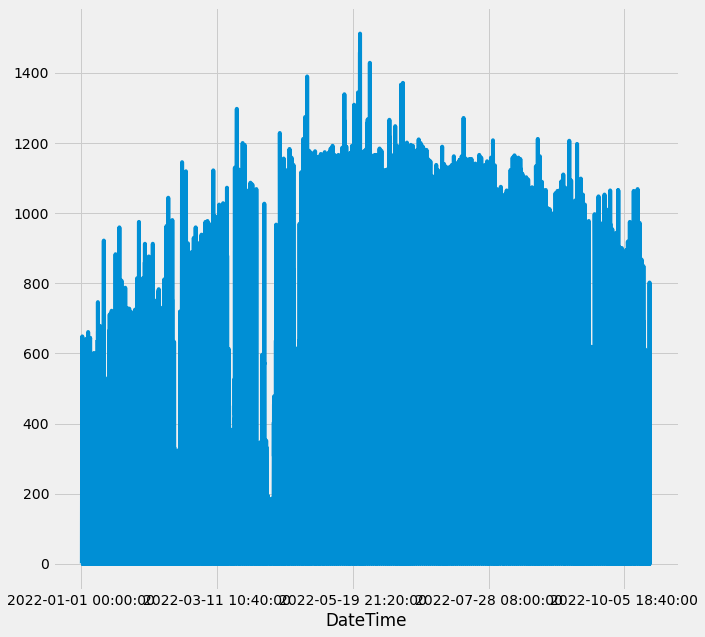

In [11]:
X3 = df_Train_Features_Transform["X3"]
X3.plot()

<AxesSubplot:xlabel='DateTime'>

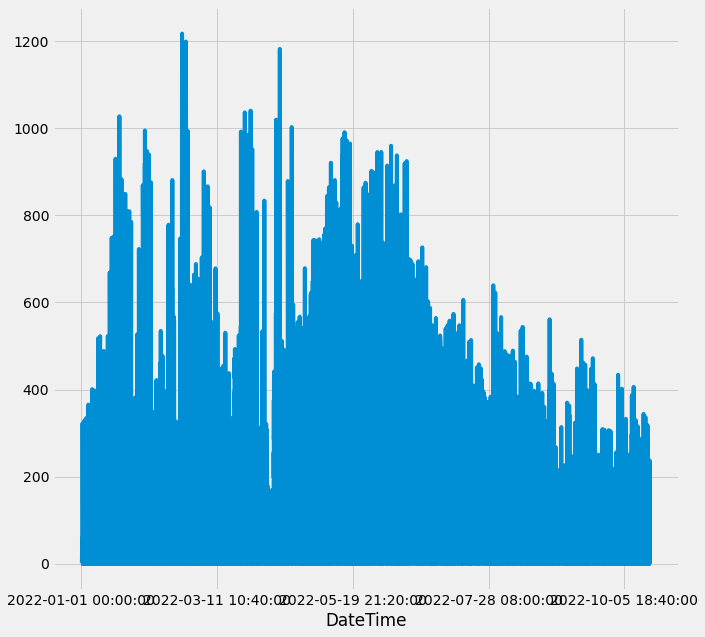

In [12]:
X4 = df_Train_Features_Transform["X4"]
X4.plot()

In [13]:
# fig , ax = plt.subplots()
# ax.plot(df_Train_Features_Transform["DateTime"],df_Train_Features_Transform["X1"])
# ax.plot(df_Train_Features_Transform["DateTime"],df_Train_Features_Transform["X2"])
# ax.plot(df_Train_Features_Transform["DateTime"],df_Train_Features_Transform["X3"])
# ax.plot(df_Train_Features_Transform["DateTime"],df_Train_Features_Transform["X4"])
# plt.show()

In [14]:
# Find corellation between Features 
attributes = ["X1","X2","X3","X4"]
df_Train_Features_Attributes = df_Train_Features_Transform[attributes]
df_Train_Features_Attributes.corr()

#Seems like no strong corellation between any of the individual fetueres

X1        X2        X3        X4
X1  1.000000 -0.472589  0.454973  0.150414
X2 -0.472589  1.000000 -0.473937 -0.247281
X3  0.454973 -0.473937  1.000000  0.546787
X4  0.150414 -0.247281  0.546787  1.000000

In [15]:
# Range of Timeseries data 
print('The time series starts from: ', df_Train_Features_Transform.DateTime.min())
print('The time series ends on: ', df_Train_Features_Transform.DateTime.max())

print("----Forecasting Data -----")
print('The time series starts from: ', df_Test.DateTime.min())
print('The time series ends on: ', df_Test.DateTime.max())

The time series starts from:  2022-01-01 00:00:00
The time series ends on:  2022-10-19 04:30:00
----Forecasting Data -----
The time series starts from:  2022-10-19 04:40:00
The time series ends on:  2022-12-30 23:50:00


In [16]:
attributes = ["X1","X2","X3","X4","Y"]
df_Train_Features = df_Train[attributes]
df_Train_Features


X1     X2      X3      X4             Y
0      2.186333  13.76  0.0663  0.1547  521163.83540
1      2.138000  13.90  0.0910  0.1105  449066.62018
2      2.104333  13.90  0.0806  0.1300  437394.72159
3      2.040333  14.00  0.1183  0.1248  422107.63292
4      1.973667  14.14  0.0624  0.1105  406923.83540
...         ...    ...     ...     ...           ...
41927  5.856667  17.66  0.1092  0.1391  365929.91028
41928  5.860000  17.66  0.1183  0.1495  368822.51417
41929  5.846667  17.68  0.1001  0.1976  373857.78769
41930  5.856667  17.66  0.1183  0.1391  373536.38739
41931  5.876667  17.68  0.0767  0.1690  376643.25826

[41932 rows x 5 columns]

In [17]:
# Apply normalisation 
scaler = MinMaxScaler()
data_scaled=scaler.fit_transform(df_Train_Features)
data_scaled

array([[9.00905802e-02, 7.57458162e-01, 4.04128647e-05, 1.06839776e-04,
        5.26251232e-01],
       [8.61463972e-02, 7.65947126e-01, 5.67499802e-05, 7.05142519e-05,
        4.15544975e-01],
       [8.33990697e-02, 7.65947126e-01, 4.98711947e-05, 8.65402182e-05,
        3.97622616e-01],
       ...,
       [3.88787640e-01, 9.95149163e-01, 6.27689175e-05, 1.42096902e-04,
        3.00060788e-01],
       [3.89603678e-01, 9.93936454e-01, 7.48067921e-05, 9.40190025e-05,
        2.99567273e-01],
       [3.91235753e-01, 9.95149163e-01, 4.72916502e-05, 1.18592151e-04,
        3.04337916e-01]])

In [18]:
features = data_scaled
target = data_scaled[:,0]
features

array([[9.00905802e-02, 7.57458162e-01, 4.04128647e-05, 1.06839776e-04,
        5.26251232e-01],
       [8.61463972e-02, 7.65947126e-01, 5.67499802e-05, 7.05142519e-05,
        4.15544975e-01],
       [8.33990697e-02, 7.65947126e-01, 4.98711947e-05, 8.65402182e-05,
        3.97622616e-01],
       ...,
       [3.88787640e-01, 9.95149163e-01, 6.27689175e-05, 1.42096902e-04,
        3.00060788e-01],
       [3.89603678e-01, 9.93936454e-01, 7.48067921e-05, 9.40190025e-05,
        2.99567273e-01],
       [3.91235753e-01, 9.95149163e-01, 4.72916502e-05, 1.18592151e-04,
        3.04337916e-01]])

In [19]:
xtrain,xtest,ytrain,ytest=train_test_split(features,target,test_size=0.20,random_state=123,shuffle=False)

In [20]:
xtrain.shape

(33545, 5)

In [21]:
xtest.shape

(8387, 5)

In [22]:
ytrain.shape

(33545,)

In [23]:
win_length=720
batch_size=32
num_features=4
train_generator = TimeseriesGenerator(xtrain, ytrain, length=win_length, sampling_rate=1, batch_size=batch_size)
test_generator = TimeseriesGenerator(xtest, ytest, length=win_length, sampling_rate=1, batch_size=batch_size)

In [24]:
train_generator[0]

(array([[[9.00905802e-02, 7.57458162e-01, 4.04128647e-05, 1.06839776e-04,
          5.26251232e-01],
         [8.61463972e-02, 7.65947126e-01, 5.67499802e-05, 7.05142519e-05,
          4.15544975e-01],
         [8.33990697e-02, 7.65947126e-01, 4.98711947e-05, 8.65402182e-05,
          3.97622616e-01],
         ...,
         [1.69001442e-01, 8.76303662e-01, 4.98711947e-05, 1.34618117e-04,
          4.56782263e-01],
         [1.58936975e-01, 8.88430754e-01, 2.49355974e-05, 1.34618117e-04,
          4.31405470e-01],
         [1.59481000e-01, 8.90856173e-01, 2.49355974e-05, 1.46370493e-04,
          4.09200777e-01]],
 
        [[8.61463972e-02, 7.65947126e-01, 5.67499802e-05, 7.05142519e-05,
          4.15544975e-01],
         [8.33990697e-02, 7.65947126e-01, 4.98711947e-05, 8.65402182e-05,
          3.97622616e-01],
         [7.81764274e-02, 7.72010672e-01, 7.48067921e-05, 8.22666272e-05,
          3.74149083e-01],
         ...,
         [1.58936975e-01, 8.88430754e-01, 2.49355974e-05, 1.

In [25]:
# Make model 
model = tf.keras.Sequential()

model.add(tf.keras.layers.LSTM(128,input_shape=(win_length,num_features),return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha=0.5))

model.add(tf.keras.layers.LSTM(128,return_sequences=True))
model.add(tf.keras.layers.LeakyReLU(alpha = 0.5))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.LSTM(64,return_sequences=False))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Dense(1))

model.summary()

Metal device set to: Apple M1


2022-01-29 21:10:28.404380: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-29 21:10:28.404563: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 720, 128)          68096     
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 720, 128)          0         
                                                                 
 lstm_1 (LSTM)               (None, 720, 128)          131584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 720, 128)          0         
                                                                 
 dropout (Dropout)           (None, 720, 128)          0         
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0

In [26]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=2,mode='min')

In [27]:
model.compile(
    loss=tf.losses.MeanSquaredError(),
    optimizer=tf.optimizers.Adam(),
    metrics=[tf.metrics.MeanAbsoluteError()]
)

In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=2,
    validation_data=test_generator,
    shuffle=False,
    callbacks = [early_stopping]
)

/var/folders/85/n2q4366x0vl1tff6jpb7lksr0000gn/T/ipykernel_1260/2941615527.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(
2022-01-29 21:10:30.074398: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/2


2022-01-29 21:10:30.931471: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-29 21:10:31.214301: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [ ]:
model.evaluate_generator(test_generator,verbose=0)

In [ ]:
predictions = model.predict_generator(test_generator)

In [124]:
predictions.shape

(7667, 1)

In [125]:
predictions

array([[0.5667602 ],
       [0.56635845],
       [0.5671621 ],
       ...,
       [0.55964476],
       [0.5617009 ],
       [0.5615303 ]], dtype=float32)

In [126]:
ytest

array([0.55226723, 0.54682697, 0.54818704, ..., 0.38878764, 0.38960368,
       0.39123575])

In [127]:
xtest

array([[5.52267225e-01, 5.81494058e-01, 7.22272476e-05, 8.22666272e-05],
       [5.46826973e-01, 5.88770313e-01, 8.42651222e-05, 6.73090586e-05],
       [5.48187036e-01, 5.87072520e-01, 7.22272476e-05, 7.90614339e-05],
       ...,
       [3.88787640e-01, 9.95149163e-01, 6.27689175e-05, 1.42096902e-04],
       [3.89603678e-01, 9.93936454e-01, 7.48067921e-05, 9.40190025e-05],
       [3.91235753e-01, 9.95149163e-01, 4.72916502e-05, 1.18592151e-04]])

In [128]:
xtest.shape

(8387, 4)

In [129]:
xtest[:,1:][win_length:]

array([[9.12684938e-01, 7.22272476e-05, 1.18592151e-04],
       [9.12684938e-01, 6.53484621e-05, 1.10044969e-04],
       [9.11472229e-01, 2.83749901e-05, 1.26070935e-04],
       ...,
       [9.95149163e-01, 6.27689175e-05, 1.42096902e-04],
       [9.93936454e-01, 7.48067921e-05, 9.40190025e-05],
       [9.95149163e-01, 4.72916502e-05, 1.18592151e-04]])

In [130]:
df_pred=pd.concat([pd.DataFrame(predictions), pd.DataFrame(xtest[:,1:][win_length:])],axis=1)

In [133]:
df_pred

0         0         1         2
0     0.566760  0.912685  0.000072  0.000119
1     0.566358  0.912685  0.000065  0.000110
2     0.567162  0.911472  0.000028  0.000126
3     0.567135  0.912685  0.000078  0.000079
4     0.566226  0.911472  0.000059  0.000107
...        ...       ...       ...       ...
7662  0.560562  0.993936  0.000069  0.000094
7663  0.560085  0.993936  0.000075  0.000103
7664  0.559645  0.995149  0.000063  0.000142
7665  0.561701  0.993936  0.000075  0.000094
7666  0.561530  0.995149  0.000047  0.000119

[7667 rows x 4 columns]

In [132]:
rev_trans=scaler.inverse_transform(df_pred)

ValueError: operands could not be broadcast together with shapes (7667,4) (5,) (7667,4) 

In [ ]:
rev_trans

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]

In [ ]:
df_final.count()

In [ ]:
df_final=df_input[predictions.shape[0]*-1:]